# Deep Learning Homework 3

-------------------------------


**Name:** Nick Thomson

**SN:** 16121669

-----------------------------------


**Start date:** *13th March 2018*

**Due date:** *29th March 2018, 11:55 pm*

------------------------------------

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw3.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

Please compile all results, all plots/figures and all answers to the understanding/analysis results questions into a PDF. Name convention: **studentnumber_DL_hw3.pdf**. Do not include any of the code (we will use the notebook for that). 

**Page limit: 15 pg **.

------------------------------------

## PART 1: MNIST as a sequence (follow-up from last assignment)
In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. The images have a resolution of $28\times 28$ pixels. This is the same dataset as in Assignment 1, but we will be using this data a bit differently this time around. Since this assignment will be focusing on recurrent networks that model sequential data, we will be looking at each image as a sequence: the networks you train will be "reading" the image one row at a time, from top to bottom (we could even do pixel-by-pixel, but in the interest of time we'll do row-by-row which is faster).  Also, we will work with a binarized version of MNIST -- we constrain the values of the pixels to be either $0$ or $1$. You can do this by applying the method `binarize`, defined below, to the raw images.

<img src="https://github.com/bodono/files/blob/master/mnist_as_sequence.png?raw=true">

* We take the MNIST images, binarise them, and interpret them as a sequence of pixels from top-left to bottom-right. ("Task 2" refers to the next homework, wherein you will be using the sequence for pixel prediction).

## Recurrent Models for MNIST

As discussed in the lectures, there are various ways and tasks for which we can use recurrent models. A depiction of the most common scenarios is available in the Figure below. In this assignment and the following one we will look at two of these forms: **many-to-one** (sequence to label/decision) and the **many-to-many** scenario where the model receives an input and produces an output at every time step. You will use these to solve the following tasks: i) pixel prediction  and ii) in-painting.

<img src="https://github.com/bodono/files/blob/master/rnn_models.png?raw=true">
* ([Figure adapted from Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness)). You will be implementing variants of *many-to-one* for classification (in this homework), and *many-to-many* for prediction (in the next homework).


## Task 1: (Next) Pixel prediction (35 pts)
In this part, you will train a **many-to-many** recurrent model: at each time $t$, the model receives as input a pixel value $x_t$ and tries to predict the next pixel in the images $x_{t+1}$ based on the current input and the recurrent state. Thus, your output function is now a probability over the value of pixel $x_{t+1}$ -- which can be either $0$ or $1$ (black or white).
\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}) = g(x_{t}, h_{t}, c_{t})
\end{equation}
Once we get to observe the actual value of $x_{t+1}$ at the next time-step, we can compute the cross-entropy between our predicted probability $\hat{p}(x_{t+1}|x_{1:t})$ and the observed value (pixel in the image). We can (and will) do that for every time-step prediction within a sequence. This will provide us with the training signal for optimizing the parameters of the mapping $g$ and the recurrent connections -- remember these are shared!, they do not change with $t$.





### Optimization
Use the Adam optimizer (with default settings other than the learning rate) for training.

**[Optional]** Sometimes dropout has been shown to be beneficial in training recurrent models, so feel free to use it or any other form of regularization that seems to improve performance. It might be also worth trying out batch-normalization. [Reference](https://arxiv.org/pdf/1603.09025.pdf).

### Models: Your models will have the following structure:
1. [(Red Block)] The *input* (current binarised row of pixels) can be fed directly into the recurrent connection without  much further pre-processing.
2. [(Blue Block)] The *output* (probabilities over the activation of the pixel) is produced by looking at the last output of the recurrent units, transforming them via an affine transformation.
3. [(Green Block)] For the *recurrent* part of the network, please implement and compare the following architectures:
    * LSTM with 32 units. **[15 pts]**
    
    **OR**
    
    * GRU with 32 units. **[15 pts]**

Your network should look like:
\begin{equation}
\textrm{Input} \Rightarrow \textrm{RNN cell} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}
\end{equation}
You might find the function `tf.nn.dynamic_rnn` useful.

### Hyper-parameters 
For all cases train the model with these hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001, *batch_size*=256, *fully_connected_hidden_units=64*

With these hyper-parameters you should give you a good perfomance on both GRUs/LSTMs. It is worth noting that in $5$ epochs the model has yet converged, but in the interest of time (the training should have $\approx$ 1h). That being said, feel free to try other settings, there are certainly better choices, but please report the results with these exact hyper-parameters and/or train for longer -- the models should still improve (convergence is achieved around 25-30 epochs). 

### Tasks:

1) Implement and train the previously described model (choose either GRU **or** LSTM). Please report the *cross-entropy* on the *test set* and *training set* of the models trained. Use the `plot_summary_table` method below to format the table. Provide the learning curves (both training and testing loss) -- choose appropiate reporting interval here (at least 20 points).

2) Using the previously trained model, visualize the 1-step predictions, 10-step predictions, one row prediction (28 steps) and filling out the image (fill out all the pixels using the recurrent model). 

*   **Generate a small in-painting dataset.** Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

*   **Predict missing parts and compare with GT**. Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).
Report the cross-entropy of your in-paintings for the trained model at beginning of training(0 epochs), after 1 epoch and at the end of training. Discuss the results: contrasting long/short time prediction; compare these with the cross-entropy of the ground truth images. For multiple steps in-paintings, average the loss over $10$ samples. **[10 pts]**

*   **Visualize completing the image**. Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include *a successful example, failure example and one that displays high variance between samples.* For each example picked, please provide $5$ samples for the last three scenarios (10, 28, 300 pixels) and $1$ for the 1-pixel prediction -- total 16 samples/exampls. The samples should be generated recursively by sampling the generative process provided by the trained recurrent connections. Total number of in-painting to report: 16 samples x 3 examples = 48 **[10 pts]**



## Task 2: Using pixel-to-pixel: In-painting task (25 pts)

Using the models trained in the previous section, please in-paint the missing pixels in the following datasets:
* [One-pixel missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/one_pixel_inpainting.npy)
* [Window of 2x2 pixels missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/2X2_pixels_inpainting.npy)

This is similar to Task 1.b, but now you have information not only about the past(previous pixels in the image) but also future (pixels that come after your predictive target)

### Results
1) Provide the formula used to compute the probability over the missing pixel and respectively for the missing patch **[5+5 pts]**

2) Visualize the most probable in-painting, according to your model. How does this compare to the ground truth? (Compare cross-entropy between your most probable sample and the ground truth). Explain the difference. It is enough to include just one example per task/dataset. **[10 pts]**


### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


# Imports and utility functions (do not modify!)

In [ ]:
#@title Import libraries
#@test {"output": "ignore"}

# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Binarize the images
def binarize(images, threshold=0.1):
  return (threshold < images).astype('float32')

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 783])
  y = tf.placeholder(tf.float32, [None, 783])
  return x, y

# Generate summary table of results. This function expects a dict with the
# following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
# list of tuples consisting of (test_loss, test_accuracy), and the list is
# ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training):
# {
#  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
# }
def plot_summary_table(experiment_results):
  # Fill Data.
  cell_text = []
  columns = ['(Beginning - 0 epochs)', '(Mid-training - 1 epoch)', '(End of training - 5 epochs)']
  for k, v in experiment_results.items():
    rows = ['Test loss', 'Test accuracy']
    cell_text=[[],[]]
    for (l, _) in v:
      cell_text[0].append(str(l))
    for (_, a) in v:
      cell_text[1].append(str(a))

    fig=plt.figure(frameon=False)
    ax = plt.gca()
    the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
    the_table.scale(2, 8)
    # Prettify.
    ax.patch.set_facecolor('None')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.text(-0.73, 0.9, k, fontsize=18)
    
    
    
def plot_learning_curves(training_loss, testing_loss):
  plt.figure()
  plt.plot(training_loss)
  plt.plot(testing_loss, 'g')
  plt.legend(['Training loss', 'Testing loss'])
   

# Train Models

Generate summary table of results. This function expects a dict with the
following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
list of tuples consisting of (test_loss, test_accuracy), and the list is
ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training) i.e. expected dictionary (final performace only):

```python
{
  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
}
```

In [ ]:
experiment_results = { 'LSTM': [] }
RNN_units = 32
epochs = 0
num_epochs = 5
learning_rate = 0.001
batch_size = 256

num_input = 1 # Inputting one pixel at a time
timesteps = 783 #
num_classes = 1 # pixel is on or off
hidden_units = 64

In [3]:
# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x = tf.placeholder("float", [None, timesteps, num_input], name='x')
  y_ = tf.placeholder("float", [None, timesteps], name='y_')
  mnist = get_data()

  LSTM = tf.nn.rnn_cell.LSTMCell(RNN_units)

  outputs, state = tf.nn.dynamic_rnn(LSTM, x, dtype=tf.float32)

  final_output = tf.nn.relu(outputs)
  
  w1 = tf.get_variable("w1", shape=[RNN_units, hidden_units], initializer=tf.contrib.layers.xavier_initializer())
  b1 = tf.get_variable("b1", shape=[hidden_units], initializer=tf.zeros_initializer())
  w2 = tf.get_variable("w2", shape=[hidden_units, num_classes], initializer=tf.contrib.layers.xavier_initializer())
  b2 = tf.get_variable("b2", shape=[num_classes], initializer=tf.zeros_initializer())
  
  hidden_1 = tf.nn.relu(tf.add(tf.matmul(tf.reshape(final_output, [-1, 32]), w1),b1))
  logits = tf.reshape(tf.add(tf.matmul(hidden_1, w2),b2), [-1,783])
  prediction = tf.nn.sigmoid(logits)
  
  loss_per_pixel = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y_)
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y_))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  train = optimizer.minimize(loss)
  
  correct_pred = tf.equal(tf.round(prediction), y_)
  accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
  
  tf.add_to_collection("prediction", prediction)
  tf.add_to_collection("loss_per_pixel", loss_per_pixel)
  
  saver = tf.train.Saver()

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
with tf.device('/device:GPU:*'):

  # Initialize variables 
  init = tf.global_variables_initializer()

 # Train
  with tf.Session() as sess:

      sess.run(init)
      
      saver.save(sess, './tmp/my_model_epoch_0')

      raw_test_data = mnist.test.images
      test_data_reshaped = binarize(raw_test_data.reshape((-1, 784, num_input)))
      test_data = test_data_reshaped[:,:-1,:]     
      test_label = test_data_reshaped[:,1:,0] 
      
      initial_loss, initial_acc = sess.run([loss, accuracy], feed_dict={x: test_data,
                                                                       y_: test_label})
      
      experiment_results['LSTM'].append((initial_loss, initial_acc))

      while mnist.train.epochs_completed < num_epochs:

        batch_x, raw_batch_y = mnist.train.next_batch(batch_size)
        batch_x = binarize(batch_x.reshape((batch_size, 784, num_input)))
        batch_x_reshaped = binarize(batch_x.reshape((batch_size, 784, num_input)))
        batch_x = batch_x_reshaped[:,:-1,:] 
        batch_y = batch_x_reshaped[:,1:,0] 

        sess.run(train, feed_dict={x: batch_x, y_: batch_y})
        
        
        if mnist.train.epochs_completed == 1 and epochs < mnist.train.epochs_completed:
          saver.save(sess, './tmp/my_model_epoch_1')

          loss_1, acc_1 = sess.run([loss, accuracy], feed_dict={x: test_data,
                                                               y_: test_label})
 
          experiment_results['LSTM'].append((loss_1, acc_1))

        if mnist.train.epochs_completed > epochs:
          epoch_loss, acc = sess.run([loss, accuracy], feed_dict={x: batch_x,
                                                                 y_: batch_y})

          print("Epoch " + str(epochs) + ", Loss= " + \
                "{:.4f}".format(epoch_loss) + ", Training Accuracy= " + \
                "{:.3f}".format(acc))
          epochs += 1
          
      final_loss, final_acc = sess.run([loss, accuracy], feed_dict={x: test_data,
                                                                   y_: test_label})
      
      experiment_results['LSTM'].append((final_loss, final_acc))
      
      print("Testing Accuracy:", final_acc )
      print("Testing Loss:", final_loss )
      
      saver.save(sess, './tmp/my_model_epoch_5')

Epoch 0, Loss= 0.1739, Training Accuracy= 0.930
Epoch 1, Loss= 0.1537, Training Accuracy= 0.936
Epoch 2, Loss= 0.1415, Training Accuracy= 0.940
Epoch 3, Loss= 0.1345, Training Accuracy= 0.946
Epoch 4, Loss= 0.1309, Training Accuracy= 0.948
Testing Accuracy: 0.9490352
Testing Loss: 0.12717427


#Results

{'LSTM': [(0.69232106, 0.82820714), (0.17816725, 0.929165), (0.12717427, 0.9490352)]}


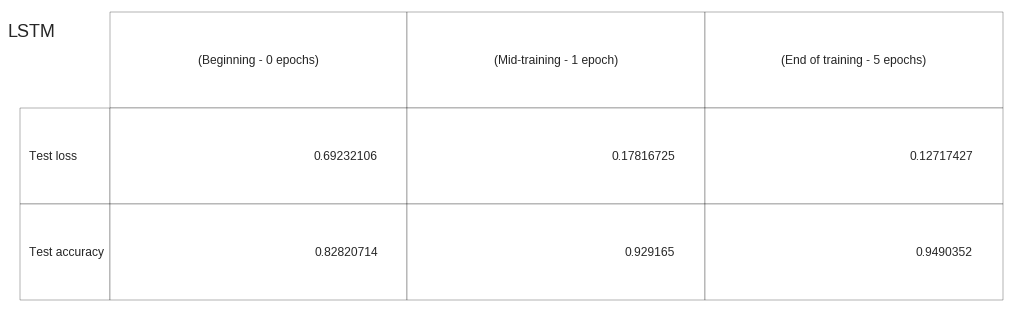

In [5]:
print(experiment_results)

plot_summary_table(experiment_results)

# Pixel prediction

### Generate a small in-painting dataset.
Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

In [ ]:
#Sample 100 images + mask 
import random, copy

test_data_reshaped_original = binarize(mnist.test.images.reshape((-1, 784, num_input)))
test_data_reshaped = copy.copy(test_data_reshaped_original)

unmasked_test_data = test_data_reshaped_original[:,:-1,:]

test_data = test_data_reshaped[:,:-1,:] # Remove last pixel as we don't want to use as an input as we don't have the next pixel    
test_label = test_data_reshaped[:,1:,0] # Take pixels after first as true label for next pixel prediction

indices = random.sample(range(len(test_label)), 100)

# Sample 100 images from test set 
sampled_images = [unmasked_test_data[i] for i in sorted(indices)]
sampled_images_unmasked = [test_data[i] for i in sorted(indices)]
sampled_label = [test_label[i] for i in sorted(indices)]
sampled_label_unmasked = [test_data_reshaped_original[:,1:,0][i] for i in sorted(indices)]

# Generate 10 samples 
sampled_images = np.repeat(sampled_images, 10, axis = 0)
sampled_label = np.repeat(sampled_label, 10, axis = 0)

# Mask images 

for i in range(len(sampled_images)):
  sampled_images[i][483:, 0] = 0.0

for i in range(len(test_data_reshaped)):
  test_data_reshaped[i][483:, 0] = 0.0

In [ ]:
# Full images for visualisation purposes
sampled_full_image = [test_data_reshaped_original[i] for i in sorted(indices)]

sampled_masked_image = [test_data_reshaped[i] for i in sorted(indices)]


### Predict missing parts and compare with the ground truth. 
Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).

In [ ]:
def ground_truth_cross_entropy(images, labels, model_num_epochs):
  meta_model = './tmp/my_model_epoch_' + str(model_num_epochs) + '.meta'
  model = './tmp/my_model_epoch_' + str(model_num_epochs)
  
  with tf.device('/device:GPU:*'):
    tf.reset_default_graph()
    with tf.Session() as sess:
      saver = tf.train.import_meta_graph(meta_model)
      saver.restore(sess,model)
      graph = tf.get_default_graph()
      
      l_p = tf.get_collection("loss_per_pixel")[0]
      loss = sess.run([l_p], feed_dict={'x:0': images, 'y_:0': labels})
      loss =  np.reshape(np.array(loss), (100, 783))
      loss_mean = np.mean(loss[:,483:], axis = 1) 
      cross_entropy =  np.mean(loss_mean)    
           
    return cross_entropy


In [ ]:
def update_image(images, predictions, nth_predicted_pixel):
  full_image = np.zeros((np.shape(images)[0],(np.shape(images)[1] + 1), np.shape(images)[2]))
  full_image[:,:-1,:] = images
  for i, image in enumerate(images):
    predicted_probability = predictions[i][482 + (nth_predicted_pixel - 1)]
    pixel_value = np.random.choice(a = [0, 1], p = [1 - predicted_probability, predicted_probability])
    full_image[i][482 + nth_predicted_pixel,0] = pixel_value
  return full_image

def visualise(y_axis,x_axis,position, image):
  pic = np.reshape(image,(28,28))
  plt.subplot(y_axis,x_axis,position)
  plt.imshow(pic, interpolation='None',vmin=-1, vmax=1)
  

In [ ]:
def fill_in_pixels(images, labels, model_num_epochs, pixels):
  meta_model = './tmp/my_model_epoch_' + str(model_num_epochs) + '.meta' 
  model = './tmp/my_model_epoch_' + str(model_num_epochs)
  updated_image = images                

  with tf.device('/device:GPU:*'):
    tf.reset_default_graph()
    with tf.Session() as sess:
      saver = tf.train.import_meta_graph(meta_model)
      saver.restore(sess,model)
      graph = tf.get_default_graph()
      
      pred = tf.get_collection("prediction")[0]
      l_p= tf.get_collection("loss_per_pixel")[0]

      for i in range(1, pixels+1):        
        predictions, loss_per_pixels = sess.run([pred, l_p], feed_dict={'x:0': updated_image, 'y_:0': labels})

        updated_full_image = update_image(updated_image, predictions, i)
        updated_image = updated_full_image[:,:-1,:]
        

      loss_all_pixels = np.reshape(loss_per_pixels, (100,10,783))
      
      average_loss_all_pixel = np.mean(loss_all_pixels[:,:,483:483+pixels], axis = 1)
          
      normalised_loss_all_pixel = np.mean(average_loss_all_pixel, axis = 1) 
     
      cross_entropy = [np.mean(normalised_loss_all_pixel)]
                  
      final_pred_full_image = np.reshape(updated_full_image, (100,10,28,28))
      
      predicted_images = [final_pred_full_image]
      
    return predicted_images, cross_entropy

In [11]:
five_epoch_gt = ground_truth_cross_entropy (sampled_images_unmasked, sampled_label_unmasked, 5)

five_epoch_1, five_epoch_xe_1 = fill_in_pixels(sampled_images, sampled_label, 5,1)
five_epoch_10, five_epoch_xe_10 = fill_in_pixels(sampled_images, sampled_label, 5,10)
five_epoch_28, five_epoch_xe_28 = fill_in_pixels(sampled_images, sampled_label, 5,28)
five_epoch_300, five_epoch_xe_300 = fill_in_pixels(sampled_images, sampled_label, 5,300)

five_epoch_xe = [five_epoch_xe_1,five_epoch_xe_10,five_epoch_xe_28,five_epoch_xe_300]
five_epoch_predicted_images = [five_epoch_300, five_epoch_1, five_epoch_10, five_epoch_28]

one_epoch_1, one_epoch_xe_1 = fill_in_pixels(sampled_images, sampled_label, 1,1)
one_epoch_10, one_epoch_xe_10 = fill_in_pixels(sampled_images, sampled_label, 1,10)
one_epoch_28, one_epoch_xe_28 = fill_in_pixels(sampled_images, sampled_label, 1,28)
one_epoch_300, one_epoch_xe_300 = fill_in_pixels(sampled_images, sampled_label, 1,300)

one_epoch_xe = [one_epoch_xe_1,one_epoch_xe_10,one_epoch_xe_28,one_epoch_xe_300]
one_epoch_predicted_images = [one_epoch_300, one_epoch_1, one_epoch_10, one_epoch_28]

zero_epoch_1, zero_epoch_xe_1 = fill_in_pixels(sampled_images, sampled_label, 0,1)
zero_epoch_10, zero_epoch_xe_10 = fill_in_pixels(sampled_images, sampled_label, 0,10)
zero_epoch_28, zero_epoch_xe_28 = fill_in_pixels(sampled_images, sampled_label, 0,28)
zero_epoch_300, zero_epoch_xe_300 = fill_in_pixels(sampled_images, sampled_label, 0,300)

zero_epoch_xe = [zero_epoch_xe_1,zero_epoch_xe_10,zero_epoch_xe_28,zero_epoch_xe_300]
zero_epoch_predicted_images = [zero_epoch_300, zero_epoch_1, zero_epoch_10, zero_epoch_28]

INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_1
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_1
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_1
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_1
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_0
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_0
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_0
INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_0


In [12]:
print(five_epoch_gt)
print(five_epoch_xe)
print(one_epoch_xe)
print(zero_epoch_xe) 

0.6904275
[[0.56384814], [0.604053], [0.3809375], [0.77542514]]
[[0.6560116], [0.8165776], [0.5411918], [0.6739235]]
[[0.6929954], [0.6932528], [0.69424796], [0.6947293]]


**Predict missing parts and compare with GT**. Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).
Report the cross-entropy of your in-paintings for the trained model at beginning of training(0 epochs), after 1 epoch and at the end of training. Discuss the results: contrasting long/short time prediction; compare these with the cross-entropy of the ground truth images. For multiple steps in-paintings, average the loss over $10$ samples. **[10 pts]**


**Answer**

The cross entropy of the generated images was lower than the grund truth on average. The lower epoch models showed very little variance in their losses, this is could be due to the model learning the long/short term predictions better as the epochs increases, the mean of these losses is very close to $-log(\frac{1}{2})$, due to the randomness of the initial predictions. As the epochs increase the variance of the losses increases while the mean decreases. The five epoch predictions have very low loss for the 1-28 pixel predictions, while higher loss for the 300 pixel. This could be due to the low accuracy of long term predictions. The 1 epoch losses are somewhat in the middle, with similar mean and higher variance than the 0 epoch model. The 300 pixel model has very similar loss to the 0 epoch, this could be because long term predictions are unable to accurately predict the pixels or effect the probability distribution of the fill-in. This means that the model may revert to the random loss and thus converge to loss of $-log(\frac{1}{2})$.


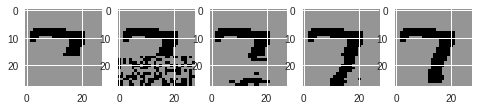

In [90]:
image_plot = 80
visualise(1,5,1,sampled_masked_image[image_plot])
visualise(1,5,2,zero_epoch_predicted_images[0][0][image_plot][4])
visualise(1,5,3,one_epoch_predicted_images[0][0][image_plot][4])
visualise(1,5,4,five_epoch_predicted_images[0][0][image_plot][4])
visualise(1,5,5,sampled_full_image[image_plot])


### Visualize completing the image. 
Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include \textit{a successful example, failure example and one that displays high variance between samples.}

### Successful Example

These examples are mostly successful with a little bit of noise in the initial predicted pixels.

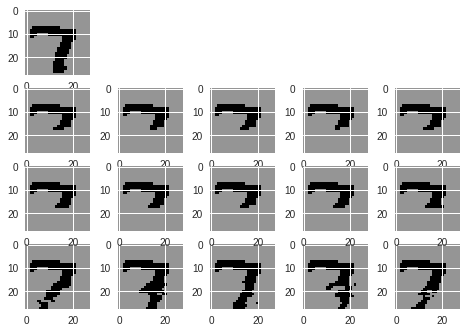

In [153]:


visualise(4,5,1,sampled_full_image[80])
visualise(4,5,16,five_epoch_predicted_images[0][0][80][8])
visualise(4,5,6,five_epoch_predicted_images[2][0][80][8])
visualise(4,5,11,five_epoch_predicted_images[3][0][80][8])

visualise(4,5,17,five_epoch_predicted_images[0][0][80][2])
visualise(4,5,7,five_epoch_predicted_images[2][0][80][2])
visualise(4,5,12,five_epoch_predicted_images[3][0][80][2])

visualise(4,5,18,five_epoch_predicted_images[0][0][80][4])
visualise(4,5,8,five_epoch_predicted_images[2][0][80][4])
visualise(4,5,13,five_epoch_predicted_images[3][0][80][4])

visualise(4,5,19,five_epoch_predicted_images[0][0][80][3])
visualise(4,5,9,five_epoch_predicted_images[2][0][80][3])
visualise(4,5,14,five_epoch_predicted_images[3][0][80][3])

visualise(4,5,20,five_epoch_predicted_images[0][0][80][6])
visualise(4,5,10,five_epoch_predicted_images[2][0][80][6])
visualise(4,5,15,five_epoch_predicted_images[3][0][80][6])



### Unsuccessful Example

This example shows a poor attempt at predicting the number 4, this is because the pixels used for learning are the top half of the 4 which is very different from the bottom half. Therefore, as the model learns the composition of the top half, it is unable to use this to predict the bottom half.

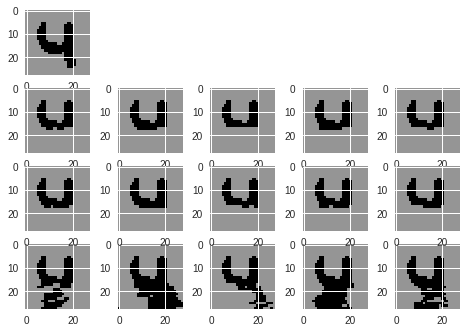

In [162]:


visualise(4,5,1,sampled_full_image[30])
visualise(4,5,16,five_epoch_predicted_images[0][0][30][8])
visualise(4,5,6,five_epoch_predicted_images[2][0][30][8])
visualise(4,5,11,five_epoch_predicted_images[3][0][30][8])

visualise(4,5,17,five_epoch_predicted_images[0][0][30][2])
visualise(4,5,7,five_epoch_predicted_images[2][0][30][2])
visualise(4,5,12,five_epoch_predicted_images[3][0][30][2])

visualise(4,5,18,five_epoch_predicted_images[0][0][30][4])
visualise(4,5,8,five_epoch_predicted_images[2][0][30][4])
visualise(4,5,13,five_epoch_predicted_images[3][0][30][4])

visualise(4,5,19,five_epoch_predicted_images[0][0][30][3])
visualise(4,5,9,five_epoch_predicted_images[2][0][30][3])
visualise(4,5,14,five_epoch_predicted_images[3][0][30][3])

visualise(4,5,20,five_epoch_predicted_images[0][0][30][6])
visualise(4,5,10,five_epoch_predicted_images[2][0][30][6])
visualise(4,5,15,five_epoch_predicted_images[3][0][30][6])



### High Variance Example ### 
This example is able to show the number 6 and predict the pixels very well in the first two cases. However, the last three cases are very noisy and not useful.


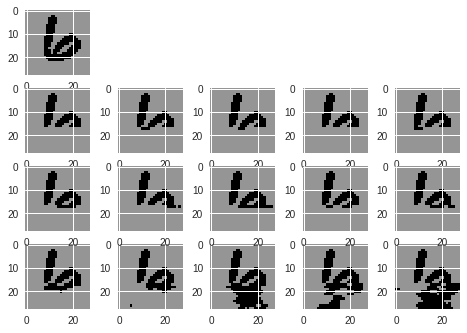

In [114]:

visualise(4,5,1,sampled_full_image[2])
visualise(4,5,16,five_epoch_predicted_images[0][0][2][2])
visualise(4,5,6,five_epoch_predicted_images[2][0][2][2])
visualise(4,5,11,five_epoch_predicted_images[3][0][2][2])

visualise(4,5,17,five_epoch_predicted_images[0][0][2][3])
visualise(4,5,7,five_epoch_predicted_images[2][0][2][3])
visualise(4,5,12,five_epoch_predicted_images[3][0][2][3])

visualise(4,5,18,five_epoch_predicted_images[0][0][2][4])
visualise(4,5,8,five_epoch_predicted_images[2][0][2][4])
visualise(4,5,13,five_epoch_predicted_images[3][0][2][4])

visualise(4,5,19,five_epoch_predicted_images[0][0][2][5])
visualise(4,5,9,five_epoch_predicted_images[2][0][2][5])
visualise(4,5,14,five_epoch_predicted_images[3][0][2][5])

visualise(4,5,20,five_epoch_predicted_images[0][0][2][6])
visualise(4,5,10,five_epoch_predicted_images[2][0][2][6])
visualise(4,5,15,five_epoch_predicted_images[3][0][2][6])



# In-painting Task

### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


In [22]:
# Downloading the inpainting datasets
!git clone https://github.com/dianaborsa/compgi22_dl_cw4.git

Cloning into 'compgi22_dl_cw4'...
remote: Counting objects: 16, done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 6), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [ ]:
# Load the dataset (2X2)
dataset = np.load('compgi22_dl_cw4/2X2_pixels_inpainting.npy')

In [ ]:
# Load the dataset (1X1)
one_pixel_dataset = np.load('compgi22_dl_cw4/one_pixel_inpainting.npy') 

Loaded dataset has 1000 samples: cropped + GT
747
840
796


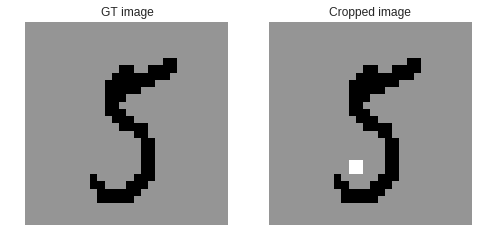

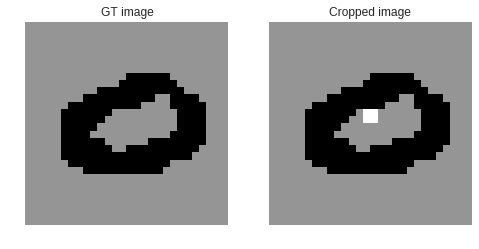

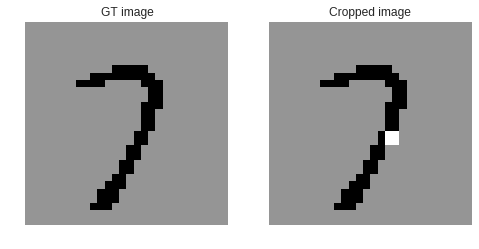

In [25]:
# checking loading
images    = dataset[0]
gt_images = dataset[1] 

nSamples, ndim = gt_images.shape
print('Loaded dataset has {} samples: cropped + GT'.format(nSamples))

# randomly visualize a few samples
for SampleID in np.random.randint(nSamples,size=3):
  print(SampleID)
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(np.reshape(gt_images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("GT image")
  plt.grid(False)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(np.reshape(images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Cropped image")
  plt.grid(False)
  plt.axis('off')

In [ ]:
def in_painting_update_image(images, predictions, nth_predicted_pixel):
  
  full_image = np.zeros((np.shape(images)[0],(np.shape(images)[1] + 1), np.shape(images)[2]))
  full_image[:,:-1,:] = images
  
  for i in range(len(images)):
    predicted_probability = predictions[i][(nth_predicted_pixel - 1)]
    pixel_value = np.round(predicted_probability) # select most probable pixel
    
    # Only update if the pixel is from the missing patch
    if full_image[i][nth_predicted_pixel,0] == -1.0:

      full_image[i][nth_predicted_pixel,0] = pixel_value      
      
  return full_image

def ground_truth_cross_entropy(images, labels, model_num_epochs):
  meta_model = './tmp/my_model_epoch_' + str(model_num_epochs) + '.meta'
  model = './tmp/my_model_epoch_' + str(model_num_epochs)
  
  with tf.device('/device:GPU:*'):
    tf.reset_default_graph()
    with tf.Session() as sess:
      saver = tf.train.import_meta_graph(meta_model)
      saver.restore(sess,model)
      graph = tf.get_default_graph()
      
      l_p = tf.get_collection("loss_per_pixel")[0]
      loss = sess.run([l_p], feed_dict={'x:0': images, 'y_:0': labels})
      loss =  np.reshape(np.array(loss), (1000, 783))
      loss_mean = np.mean(loss[:,483:], axis = 1) 
      cross_entropy =  np.mean(loss_mean)    
           
    return cross_entropy

### One-pixel prediction 

In [27]:
# Prepare Data
one_pixel_in_painting_images   = np.reshape(one_pixel_dataset[0,:,:-1],(-1, 783, 1))
one_pixel_in_painting_images_gt   = np.reshape(one_pixel_dataset[1,:,:-1],(-1, 783, 1))
one_pixel_in_painting_labels = one_pixel_dataset[1,:,1:]

with tf.device('/device:GPU:*'):
  tf.reset_default_graph()
  with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./tmp/my_model_epoch_5.meta')
    saver.restore(sess,'./tmp/my_model_epoch_5')
    graph = tf.get_default_graph()

    p = tf.get_collection("prediction")[0]
    l_p = tf.get_collection("loss_per_pixel")[0]

    for i in range(782):
      pixel_number = i+1

      if np.amin(one_pixel_in_painting_images[:,pixel_number,0]) == -1.0:
        predictions, loss_per_p = sess.run([p, l_p], feed_dict={'x:0': one_pixel_in_painting_images, 'y_:0': one_pixel_in_painting_labels})

        updated_full_image = in_painting_update_image(one_pixel_in_painting_images, predictions, pixel_number)
        one_pixel_in_painting_images = updated_full_image[:,:-1,:]

      if pixel_number%100 == 0:
        print(pixel_number)


    loss_all_pixels = np.reshape(loss_per_p, (1000,783)) 

    average_loss_all_pixel = np.mean(loss_all_pixels, axis = 1) #loss normalised across pixels

    cross_entropy = np.mean(average_loss_all_pixel) #loss averaged across images in batch

    final_pred_full_image = np.reshape(updated_full_image, (1000,28,28))



INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
100
200
300
400
500
600
700


In [30]:
print(ground_truth_cross_entropy (one_pixel_in_painting_images_gt, one_pixel_in_painting_labels, 5))
print(cross_entropy)

INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
0.1193596
0.13160448


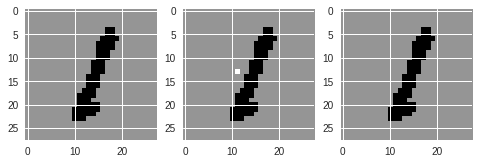

In [31]:

# Visualize samples
image_plot = 3
visualise(1,3,1,final_pred_full_image[image_plot])
visualise(1,3,2,one_pixel_dataset[0][image_plot])
visualise(1,3,3,one_pixel_dataset[1][image_plot])


### Two-by-two patch prediction 

In [32]:
in_painting_images   = np.reshape(dataset[0,:,:-1],(-1, 783, 1))
in_painting_images_gt   = np.reshape(dataset[1,:,:-1],(-1, 783, 1))
in_painting_labels = dataset[1,:,1:]

with tf.device('/device:GPU:*'):
  tf.reset_default_graph()
  with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./tmp/my_model_epoch_5.meta')
    saver.restore(sess,'./tmp/my_model_epoch_5')
    graph = tf.get_default_graph()

    p = tf.get_collection("prediction")[0]
    l_p = tf.get_collection("loss_per_pixel")[0]

    for i in range(782):
      pixel_number = i+1

      if np.amin(in_painting_images[:,pixel_number,0]) == -1.0:
        predictions, loss_per_p = sess.run([p, l_p], feed_dict={'x:0': in_painting_images, 'y_:0': in_painting_labels})

        updated_full_image = in_painting_update_image(in_painting_images, predictions, pixel_number)
        in_painting_images = updated_full_image[:,:-1,:]

      if pixel_number%100 == 0:
        print(pixel_number)


    loss_all_pixels = np.reshape(loss_per_p, (1000,783)) 

    average_loss_all_pixel = np.mean(loss_all_pixels, axis = 1) #loss normalised across pixels

    cross_entropy = np.mean(average_loss_all_pixel) #loss averaged across images in batch

    final_pred_full_image = np.reshape(updated_full_image, (1000,28,28))

INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
100
200
300
400
500
600
700


In [33]:
print(ground_truth_cross_entropy (in_painting_images_gt, in_painting_labels, 5))
print(cross_entropy)

INFO:tensorflow:Restoring parameters from ./tmp/my_model_epoch_5
0.11949003
0.13339199


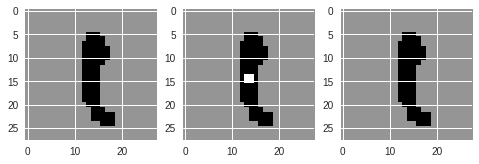

In [34]:
# Visualize samples
image_plot = 3
visualise(1,3,1,final_pred_full_image[image_plot])
visualise(1,3,2,dataset[0][image_plot])
visualise(1,3,3,dataset[1][image_plot])

### Results
**1) Provide the formula used to compute the probability over the missing pixel and respectively for the missing patch [5+5 pts]**

** Missing Pixel **

\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}) = g(x_{t}, h_{t}, c_{t})
\end{equation}

This just means the current pixel is predicted given all previous pixels.

** Missing Patch **

For top left pixel (pixel i)
\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}) = g(x_{t}, h_{t}, c_{t})
\end{equation}

This is exactly the same as 1x1 pixel prediction due to the nature of the LSTM.

For top right pixel (pixel j)

\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}) = g(\hat{x_{t}}, h_{t}, c_{t})
\end{equation}

This takes into account the pixels until t-1 and the predicted pixel.

For bottom left pixel(third pixel)

\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}, \hat{x_i}, \hat{x_j}) = g(x_{t}, h_{t}, c_{t})
\end{equation}

For $i, j \neq t$ the prediction takes into account previous pixels including the predicted pixels and the pixels between the pixels predicted and this pixel.
For the bottom right pixel (fourth pixel)

\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}, \hat{x_i}, \hat{x_j}) = g(\hat{x_{t}}, h_{t}, c_{t})
\end{equation}

Very similar update to above, we again take into account the entirity of the previous pixels.

**2) Visualize the most probable in-painting, according to your model. How does this compare to the ground truth? (Compare cross-entropy between your most probable sample and the ground truth). Explain the difference. It is enough to include just one example per task/dataset. [10 pts]**

Due to the nature of the task, the cross entropy of both the ground truth and the predicted pixels is very close. The differences between the 2 tasks were also noticable with the 2x2 pixels inpainting having higher loss on average than the 1x1 pixels, this is due to the the 2x2 inpainting filling in 4 pixels compared to the 1x1's 1. The ground truth loss is lower than the 1x1 on average, while the 1x1 is on average lower than 2x2.

----------------------------------------------------------------------

## PART 2: Learning multiple tasks with LSTM-s (40 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $3$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$. 
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $3$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. Similar to the pixel-to-pixel model, at each time step the LSTM will receive one bit of information (gets to observe the symbol recorded at this time step) and need to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.




### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,1.,1.)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *  

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$?  

* How does this (learning ability and generalization) depend on the lenght of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 

i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)

* Does this increase or descrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$?

**Answer**  I think the LSTM model will learn purely to predict the first symbol, this is due to the heavy skew of the prior. The likelihood of predicting the other 2 symbols correctly is very low and in order to maximise the probability of being correct it should predict symbol 1 100% of the time. If the prior was more uniform, then the model would predict each symbol with equal chance at the beginning of the task, as time increases the LSTM would predict which ever symbol is being produced most, however since all symbols have equal likelihood it will remain neutral. As the reset will cause the model to relearn from the prior, for shorts tasks with a highly skewed prior (10,1,1) the model should still just predict symbol 1. However with the uniform prior, the model will return to randomly picking early on and only start to learn if the symbols are presenting certain patterns. 

Wih $T=1$, the model should select symbol 1 for the skewed prior and random symbols for the uniform. For $T=\infty$, the model should learn to predict the prior, so for the skew prior it should predict symbol 2 $\frac{1}{12}$ of the time.

The both priors will increase in ability to generalise with $T=\infty$. However, the uniform prior still generalises better. As T increases the complexity also increases. 

2) **Time to check your intuitions (10 pts)** 

Implement a similar LSTM model as in PART 1. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into a 32-unit LSTM and LSTM output is processed as before: $\textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}$ . The model will be trained, as before, by cross-entropy on predicting the next symbol. You will notice that the setup is really similar to the previous tasks, so feel free to re-use whenever appropiate.

Train the following models:
* T = 5, and T=20 with the data generated from a Dirichlet with $\alpha = (10.,1.,1.)$. Unrolling length for the LSTM = 100. Minibatch size = 64. (M1, M2)
* T = 5, and T=20 with the data generated from a Dirichlet with$\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 100. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this curve smooth? Do any of them plateau?). **[2x5 pts]**


3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (10.,1.,1.)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(1,0,0)$ (You can use any of the extreme here).

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=20$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**

4) **Comparison to the Bayesian update (15 pts)**

Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[3 pts]**

ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors) **[5 pts]**

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=20$ and respectively models M2 and M4.

5) **Play (not for credit, just for fun)**

Visualize the hidden state of the LSTM. Look at the eigenvalues: How many of these are actual revelant? What do they correspond to?



In [ ]:
#@title Generate data function

n_symbols = 3
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.3, 1.3, 1.3), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])
  

### Training your recurrent model

In [ ]:
RNN_units = 32
epochs = 0
num_epochs = 5
learning_rate = 0.001
batch_size = 64
num_input = 4
timesteps = 100
num_classes = 4
hidden_units = 64
test_batch_size = 10000

In [ ]:

with tf.device('/device:GPU:*'):

  
  tf.reset_default_graph()
  x = tf.placeholder("float", [None, timesteps - 1, num_input], name='x')
  y_ = tf.placeholder("float", [None, timesteps - 1, num_classes], name='y_')

  LSTM = tf.nn.rnn_cell.LSTMCell(RNN_units)

  outputs, state = tf.nn.dynamic_rnn(LSTM, x, dtype=tf.float32)

  final_output = tf.nn.relu(outputs)
  
  w1 = tf.get_variable("w1", shape=[RNN_units, hidden_units], initializer=tf.contrib.layers.xavier_initializer())
  b1 = tf.get_variable("b1", shape=[hidden_units], initializer=tf.zeros_initializer())
  w2 = tf.get_variable("w2", shape=[hidden_units, num_classes], initializer=tf.contrib.layers.xavier_initializer())
  b2 = tf.get_variable("b2", shape=[num_classes], initializer=tf.zeros_initializer())
  
  hidden_1 = tf.nn.relu(tf.add(tf.matmul(tf.reshape(final_output, [-1, 32]), w1),b1))
  logits = tf.reshape(tf.add(tf.matmul(hidden_1, w2),b2), [-1,99, num_classes])
  prediction = tf.nn.softmax(logits)
  
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  train = optimizer.minimize(loss)
  
  correct_pred = tf.equal(tf.round(prediction), y_)
  accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
  
  tf.add_to_collection("prediction", prediction)
  tf.add_to_collection("loss", loss)
  
  saver = tf.train.Saver()

In [38]:
M1_accuracy = []
M1_loss = []

with tf.device('/device:GPU:*'):

  # Initialize variables 
  init = tf.global_variables_initializer()

 # Train
  with tf.Session() as sess:

      sess.run(init)
      
      for batch_no in range(1, 1001):
        minibatch = get_minibatch(batch_size = batch_size, ntasks = 20, nsamples_per_task = 4,  alpha = (10.,1.,1.))
        batch_data = minibatch[:,:-1,:]
        batch_labels = minibatch[:,1:,:]
        sess.run(train, feed_dict={x: batch_data, y_: batch_labels})

        if batch_no % 10 == 0:
            # Calculate loss and accuracy
            batch_loss, batch_acc = sess.run([loss, accuracy], feed_dict={x: batch_data,
                                                                 y_: batch_labels})

            M1_accuracy.append(batch_acc)
            M1_loss.append(batch_loss)
        if batch_no % 100 == 0:
            print("Batch: " + str(batch_no) + ", Loss= " + \
                  "{:.4f}".format(batch_loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(batch_acc))

      # Calculate accuracy on test images
      testset = get_minibatch(batch_size = test_batch_size, ntasks = 20, nsamples_per_task = 4,  alpha = (10.,1.,1.))
      test_data = minibatch[:,:-1,:]
      test_labels = minibatch[:,1:,:]
      test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: test_data,
                                                                   y_: test_labels})
      
      print("Testing Accuracy:", test_acc )
      
      print("Testing Loss:", test_loss)
      
      saver.save(sess, './my_model_1')

Batch: 100, Loss= 0.9094, Training Accuracy= 0.829
Batch: 200, Loss= 0.5842, Training Accuracy= 0.921
Batch: 300, Loss= 0.4601, Training Accuracy= 0.936
Batch: 400, Loss= 0.4496, Training Accuracy= 0.936
Batch: 500, Loss= 0.4478, Training Accuracy= 0.935
Batch: 600, Loss= 0.4566, Training Accuracy= 0.932
Batch: 700, Loss= 0.4540, Training Accuracy= 0.933
Batch: 800, Loss= 0.4466, Training Accuracy= 0.934
Batch: 900, Loss= 0.4532, Training Accuracy= 0.933
Batch: 1000, Loss= 0.4509, Training Accuracy= 0.933
Testing Accuracy: 0.9326862
Testing Loss: 0.45088246


In [39]:
M2_accuracy = []
M2_loss = []

with tf.device('/device:GPU:*'):

  
  init = tf.global_variables_initializer()
  
  with tf.Session() as sess:

      sess.run(init)
      
      for batch_no in range(1, 1001):
        minibatch = get_minibatch(batch_size = batch_size, ntasks = 5, nsamples_per_task = 19,  alpha = (10.,1.,1.))
        batch_data = minibatch[:,:-1,:]
        batch_labels = minibatch[:,1:,:]
        sess.run(train, feed_dict={x: batch_data, y_: batch_labels})

        if batch_no % 10 == 0:
            batch_loss, batch_acc = sess.run([loss, accuracy], feed_dict={x: batch_data,
                                                                 y_: batch_labels})

            M2_accuracy.append(batch_acc)
            M2_loss.append(batch_loss)
        if batch_no % 100 == 0:
            print("Batch: " + str(batch_no) + ", Loss= " + \
                  "{:.4f}".format(batch_loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(batch_acc))

      testset = get_minibatch(batch_size = test_batch_size, ntasks = 5, nsamples_per_task = 19,  alpha = (10.,1.,1.))
      test_data = minibatch[:,:-1,:]
      test_labels = minibatch[:,1:,:]
      test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: test_data,
                                                                   y_: test_labels})
      
      print("Testing Accuracy:", test_acc )
      
      print("Testing Loss:", test_loss)
      
      saver.save(sess, './my_model_2')





Batch: 100, Loss= 0.7512, Training Accuracy= 0.891
Batch: 200, Loss= 0.7439, Training Accuracy= 0.893
Batch: 300, Loss= 0.7077, Training Accuracy= 0.896
Batch: 400, Loss= 0.6214, Training Accuracy= 0.907
Batch: 500, Loss= 0.5375, Training Accuracy= 0.924
Batch: 600, Loss= 0.5100, Training Accuracy= 0.927
Batch: 700, Loss= 0.5371, Training Accuracy= 0.919
Batch: 800, Loss= 0.5663, Training Accuracy= 0.915
Batch: 900, Loss= 0.5120, Training Accuracy= 0.922
Batch: 1000, Loss= 0.5141, Training Accuracy= 0.922
Testing Accuracy: 0.92203283
Testing Loss: 0.51414907


In [40]:
M3_accuracy = []
M3_loss = []

with tf.device('/device:GPU:*'):

  
  init = tf.global_variables_initializer()
  
  with tf.Session() as sess:

      sess.run(init)
      
      for batch_no in range(1, 1001):
        minibatch = get_minibatch(batch_size = batch_size, ntasks = 20, nsamples_per_task = 4,  alpha = (1.3,1.3,1.3))
        batch_data = minibatch[:,:-1,:]
        batch_labels = minibatch[:,1:,:]
        sess.run(train, feed_dict={x: batch_data, y_: batch_labels})

        if batch_no % 10 == 0:
            batch_loss, batch_acc = sess.run([loss, accuracy], feed_dict={x: batch_data,
                                                                 y_: batch_labels})

            M3_accuracy.append(batch_acc)
            M3_loss.append(batch_loss)
        if batch_no % 100 == 0:
            print("Batch: " + str(batch_no) + ", Loss= " + \
                  "{:.4f}".format(batch_loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(batch_acc))

      testset = get_minibatch(batch_size = test_batch_size, ntasks = 20, nsamples_per_task = 4,  alpha = (1.3,1.3,1.3))
      test_data = minibatch[:,:-1,:]
      test_labels = minibatch[:,1:,:]
      test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: test_data,
                                                                   y_: test_labels})
      
      print("Testing Accuracy:", test_acc )
      
      print("Testing Loss:", test_loss)
      
      saver.save(sess, './my_model_3')





Batch: 100, Loss= 1.0268, Training Accuracy= 0.799
Batch: 200, Loss= 0.8592, Training Accuracy= 0.807
Batch: 300, Loss= 0.8470, Training Accuracy= 0.808
Batch: 400, Loss= 0.8471, Training Accuracy= 0.806
Batch: 500, Loss= 0.8430, Training Accuracy= 0.806
Batch: 600, Loss= 0.8450, Training Accuracy= 0.805
Batch: 700, Loss= 0.8461, Training Accuracy= 0.805
Batch: 800, Loss= 0.8342, Training Accuracy= 0.808
Batch: 900, Loss= 0.8334, Training Accuracy= 0.808
Batch: 1000, Loss= 0.8384, Training Accuracy= 0.807
Testing Accuracy: 0.8073706
Testing Loss: 0.83844924


In [41]:
M4_accuracy = []
M4_loss = []

with tf.device('/device:GPU:*'):

  
  init = tf.global_variables_initializer()
  
  with tf.Session() as sess:

      sess.run(init)
      
      for batch_no in range(1, 1001):
        minibatch = get_minibatch(batch_size = batch_size, ntasks = 5, nsamples_per_task = 19,  alpha = (1.3,1.3,1.3))
        batch_data = minibatch[:,:-1,:]
        batch_labels = minibatch[:,1:,:]
        sess.run(train, feed_dict={x: batch_data, y_: batch_labels})

        if batch_no % 10 == 0:
            batch_loss, batch_acc = sess.run([loss, accuracy], feed_dict={x: batch_data,
                                                                 y_: batch_labels})

            M4_accuracy.append(batch_acc)
            M4_loss.append(batch_loss)
        if batch_no % 100 == 0:
            print("Batch: " + str(batch_no) + ", Loss= " + \
                  "{:.4f}".format(batch_loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(batch_acc))

      testset = get_minibatch(batch_size = test_batch_size, ntasks = 5, nsamples_per_task = 19,  alpha = (1.3,1.3,1.3))
      test_data = minibatch[:,:-1,:]
      test_labels = minibatch[:,1:,:]
      test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: test_data,
                                                                   y_: test_labels})
      
      print("Testing Accuracy:", test_acc )
      
      print("Testing Loss:", test_loss)
      
      saver.save(sess, './my_model_4')





Batch: 100, Loss= 1.1411, Training Accuracy= 0.766
Batch: 200, Loss= 1.1285, Training Accuracy= 0.770
Batch: 300, Loss= 1.0130, Training Accuracy= 0.776
Batch: 400, Loss= 0.9650, Training Accuracy= 0.783
Batch: 500, Loss= 0.9442, Training Accuracy= 0.787
Batch: 600, Loss= 0.9511, Training Accuracy= 0.783
Batch: 700, Loss= 0.9316, Training Accuracy= 0.785
Batch: 800, Loss= 0.9250, Training Accuracy= 0.792
Batch: 900, Loss= 0.9414, Training Accuracy= 0.784
Batch: 1000, Loss= 0.9148, Training Accuracy= 0.792
Testing Accuracy: 0.79229796
Testing Loss: 0.9147676


### Analysing your recurrent model

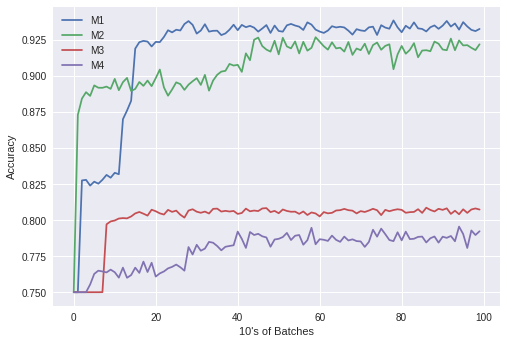

In [42]:
# Plot learning curves 

plt.plot(M1_accuracy, label='M1')
plt.plot(M2_accuracy, label='M2')
plt.plot(M3_accuracy, label='M3')
plt.plot(M4_accuracy, label='M4')

plt.ylabel('Accuracy')
plt.xlabel("10's of Batches")
plt.legend()
plt.show()

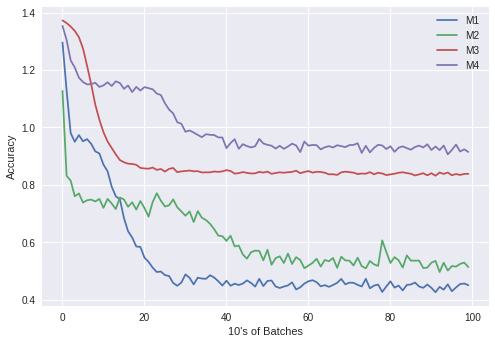

In [43]:
# Plot learning curves 

plt.plot(M1_loss, label='M1')
plt.plot(M2_loss, label='M2')
plt.plot(M3_loss, label='M3')
plt.plot(M4_loss, label='M4')

plt.ylabel('Accuracy')
plt.xlabel("10's of Batches")
plt.legend()
plt.show()

In [ ]:
def test_performance (ntasks, nsamples_per_task, alpha, model_num):
  meta_model = './my_model_' + str(model_num) + '.meta'
  model = './my_model_' + str(model_num)
  
  #Use the model for predictions and compare log likelihood
  with tf.device('/device:GPU:*'):
    tf.reset_default_graph()
    with tf.Session() as sess:
      saver = tf.train.import_meta_graph(meta_model)
      saver.restore(sess,model)
      graph = tf.get_default_graph()
      
      preds = tf.get_collection("prediction")[0]
      losses = tf.get_collection("loss")[0]
      
      minibatch = get_minibatch(10000, ntasks, nsamples_per_task, p=None, alpha=alpha)      
      data = minibatch[:,:-1,:]
      labels = minibatch[:,1:,:]
      loss, p = sess.run([losses, preds], feed_dict={'x:0': data, 'y_:0': labels})
                            
    return loss, p

In [45]:
m1_a1_loss, m1_a1_p = test_performance(20, 4, (10.,1.,1.) ,1)
m1_a2_loss, m1_a2_p = test_performance(20, 4, (1.3,1.3,1.3) ,1)
m1_a3_loss, m1_a3_p = test_performance(20, 4, (1000.,1.,1.) ,1)
m1_losses = [m1_a1_loss, m1_a2_loss, m1_a3_loss]

m3_a1_loss, m3_a1_p = test_performance(20, 4, (10.,1.,1.) ,3)
m3_a2_loss, m3_a2_p = test_performance(20, 4, (1.3,1.3,1.3) ,3)
m3_a3_loss, m3_a3_p = test_performance(20, 4, (1000.,1.,1.) ,3)
m3_losses = [m3_a1_loss, m3_a2_loss, m3_a3_loss]

m2_a1_loss, m2_a1_p = test_performance(5, 19, (10.,1.,1.) ,2)
m2_a2_loss, m2_a2_p = test_performance(5, 19, (1.3,1.3,1.3) ,2)
m2_a3_loss, m2_a3_p = test_performance(5, 19, (1000.,1.,1.) ,2)
m2_losses = [m2_a1_loss, m2_a2_loss, m2_a3_loss]

m4_a1_loss, m4_a1_p = test_performance(5, 19, (10.,1.,1.) ,4)
m4_a2_loss, m4_a2_p = test_performance(5, 19, (1.3,1.3,1.3) ,4)
m4_a3_loss, m4_a3_p = test_performance(5, 19, (1000.,1.,1.) ,4)
m4_losses = [m4_a1_loss, m4_a2_loss, m4_a3_loss]

INFO:tensorflow:Restoring parameters from ./my_model_1
INFO:tensorflow:Restoring parameters from ./my_model_1
INFO:tensorflow:Restoring parameters from ./my_model_1
INFO:tensorflow:Restoring parameters from ./my_model_3
INFO:tensorflow:Restoring parameters from ./my_model_3
INFO:tensorflow:Restoring parameters from ./my_model_3
INFO:tensorflow:Restoring parameters from ./my_model_2
INFO:tensorflow:Restoring parameters from ./my_model_2
INFO:tensorflow:Restoring parameters from ./my_model_2
INFO:tensorflow:Restoring parameters from ./my_model_4
INFO:tensorflow:Restoring parameters from ./my_model_4
INFO:tensorflow:Restoring parameters from ./my_model_4


In [46]:
print("M1 performance: {} \nM3 performance: {} \nM2 performance: {} \nM4 performance: {}".format
     (m1_losses, m3_losses, m2_losses, m4_losses))

M1 performance: [0.4470628, 1.2150211, 0.1337121] 
M3 performance: [0.71561265, 0.8394574, 0.58161503] 
M2 performance: [0.52102035, 1.2319765, 0.1120379] 
M4 performance: [0.6204553, 0.9261282, 0.31768674]


It's clear to see here that model 1 performs better than model 3 in terms of loss when tested on skewed priors. When used for test 2 on the uniform prior, model 3 performed better, this is no shock as it was also trained on the uniform prior and thus the loss was lower. 

Model 2 outperformed model 4 in a similar way to model 1 and 3. This is expected as not much has changed in the testing. The difference between the two losses has reduced however, this is due to the longer sample lengths giving a model than generalises better.

In [ ]:
import matplotlib.cm as cm

def visualise_2(y_axis,x_axis,position, predictions, name):
  preds = np.mean(predictions, axis = 0)
  plt.subplot(y_axis,x_axis,position)
  
  plt.title('{} Predictions'.format(name))
            
  plt.imshow(preds, origin='lower', cmap=cm.Blues, aspect='auto', extent=[0,4,0,100])

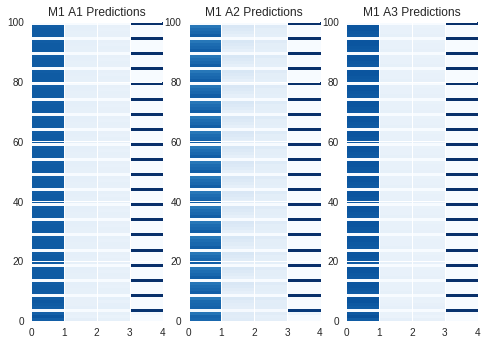

In [48]:
visualise_2(1,3,1,m1_a1_p, "M1 A1")
visualise_2(1,3,2,m1_a2_p, "M1 A2")
visualise_2(1,3,3,m1_a3_p, "M1 A3")

Model 1 is trained on the prior (10,1,1), this means that it favours Symbol 1 heavily when being tested on each test set. This is also the reason the for the increase in loss when being tested on A2, as they have a uniform prior. As the samples increase in each task the prior changes, this can be seen in the left column of "M1 A2" getting lighter each task.

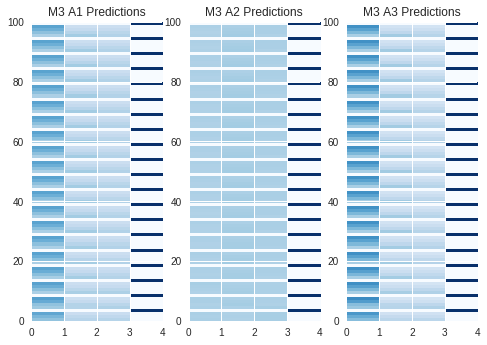

In [49]:
visualise_2(1,3,1,m3_a1_p, "M3 A1")
visualise_2(1,3,2,m3_a2_p, "M3 A2")
visualise_2(1,3,3,m3_a3_p, "M3 A3")

M3 predicts with a uniform nature to start each task and M3A2 clearly shows that this doesn't change for this test. The other noticable difference was that M3A1 shows an increase in likelihood of predicting symbol 1, but the M3A3 predictions gave a much sharper increase. 

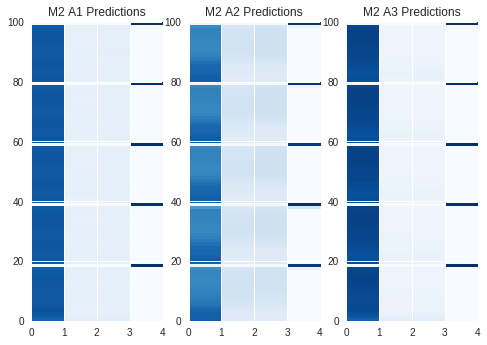

In [50]:
visualise_2(1,3,1,m2_a1_p, "M2 A1")
visualise_2(1,3,2,m2_a2_p, "M2 A2")
visualise_2(1,3,3,m2_a3_p, "M2 A3")

M2A1 and M2A3 are predicting purely symbol 1 through this task. M2A2 shows slight changes in the predictions through however, symbol 1 is still heavily favoured.

(10000, 99, 4)


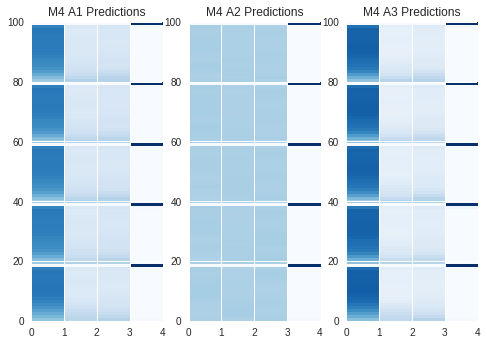

In [51]:
visualise_2(1,3,1,m4_a1_p, "M4 A1")
visualise_2(1,3,2,m4_a2_p, "M4 A2")
visualise_2(1,3,3,m4_a3_p, "M4 A3")
print(m4_a3_p.shape)

Simlarly to Model 3, the change in colour for M4A1 and M4A3 is noticable. The gradient with which M4A3 changes is much steeper. M4A2 is very similar to M3A2 in that it remains uniform across all symbols, this is expected as it was trained and test on a uniform prior.

### Bayesian Updates

In [ ]:
# Implement Bayesian update (as if you knew the 'right' prior and model)
from collections import defaultdict


class BayesianUpdate(object):

  def __init__(self, alpha):
    self._current_alpha = alpha
    self._alpha = alpha
    self._probabilities = np.zeros([99,4])    
    self._counts = defaultdict(float)
    self._timestep = 0
    
  def update(self, observation):
    
    symbol = np.argmax(observation)

    self._counts[symbol] += 1.0
    self._current_alpha[symbol] += 1.0

    if self._timestep % 20 == 0:
      self.reset()
      symbol = 3
    
    self.save_probability(symbol, self._timestep)
    self._timestep += 1
      
    
  def reset(self):
    self._counts = defaultdict(float)
    self._current_alpha = self._alpha

  def get_probability(self, symbol):  
    
    p = self._current_alpha[symbol]/np.sum(self._current_alpha)
    
    return p
  
  def save_probability(self, symbol, timestep):
    
    if symbol != 3:
      
      self._probabilities[timestep, :] = [self.get_probability(0), self.get_probability(1), self.get_probability(2), 0]
    
    else:
      self._probabilities[timestep, :] = [0,0,0, 1]
    
  def return_probabilities(self):
    return self._probabilities

In [ ]:
BM1 = BayesianUpdate([10., 1., 1.])
BM2 = BayesianUpdate([1.3, 1.3, 1.3])
BM3 = BayesianUpdate([10., 1., 1.])
BM4 = BayesianUpdate([1.3, 1.3, 1.3])
minibatch1 = get_minibatch(batch_size = 99, ntasks = 5, nsamples_per_task = 19,  alpha = (10.,1.,1.))
minibatch2 = get_minibatch(batch_size = 99, ntasks = 5, nsamples_per_task = 19,  alpha = (1.3,1.3,1.3))
minibatch3 = get_minibatch(batch_size = 99, ntasks = 5, nsamples_per_task = 19,  alpha = (1000,1.,1.))
minibatch4 = get_minibatch(batch_size = 99, ntasks = 5, nsamples_per_task = 19,  alpha = (1000.,1.,1.))
for i,j,k,l in zip(minibatch1, minibatch2, minibatch3, minibatch4):
  BM1.update(i)
  BM2.update(j)
  BM3.update(k)
  BM4.update(l)
  
BM1_probs = BM1.return_probabilities()
BM2_probs = BM2.return_probabilities()
BM3_probs = BM3.return_probabilities()
BM4_probs = BM4.return_probabilities()

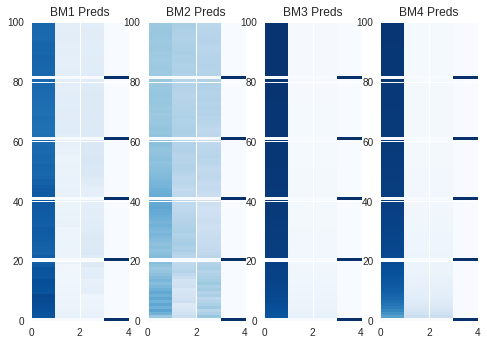

In [54]:


plt.subplot(141)
plt.title('BM1 Preds')
plt.imshow(BM1_probs, origin='lower', cmap=cm.Blues, aspect='auto', extent=[0,4,0,100])


plt.subplot(142)
plt.title('BM2 Preds')
plt.imshow(BM2_probs, origin='lower', cmap=cm.Blues, aspect='auto', extent=[0,4,0,100])


plt.subplot(143)
plt.title('BM3 Preds')
plt.imshow(BM3_probs, origin='lower', cmap=cm.Blues, aspect='auto', extent=[0,4,0,100])


plt.subplot(144)
plt.title('BM4 Preds')
plt.imshow(BM4_probs, origin='lower', cmap=cm.Blues, aspect='auto', extent=[0,4,0,100])


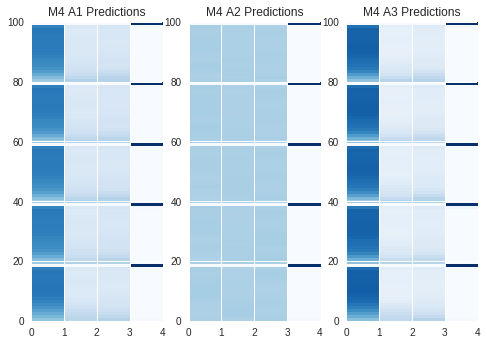

In [55]:
visualise_2(1,3,1,m4_a1_p, "M4 A1")
visualise_2(1,3,2,m4_a2_p, "M4 A2")
visualise_2(1,3,3,m4_a3_p, "M4 A3")

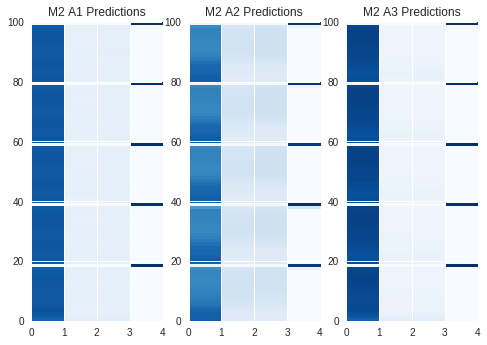

In [56]:
visualise_2(1,3,1,m2_a1_p, "M2 A1")
visualise_2(1,3,2,m2_a2_p, "M2 A2")
visualise_2(1,3,3,m2_a3_p, "M2 A3")

The bayesian model performs interestingly on batch 2, the initial predictions eventually average out to the uniform prior of the data. Otherwise the bayesian model performs more similarly to model 2 than model 4. For batch 1 and 3 there is very little difference between model 2 and the bayesian model. For batch 4, the bayesian model quickly converges to the prior of the dataset.